In [177]:
import time
from src.method_selector import MlMethodSelector, ClassicMethodSelector
from src.measurement_provider import MeasurementProvider
from src.serializer import SenMLCBORSerializer, SenMLJSONSerializer
from src.signal_generator import SignalGenerator
from sys import getsizeof
import pandas as pd
import matplotlib as plt
from src.metric import SimilarityMetricEnum
plt.rcParams["figure.dpi"] = 150

In [106]:
def compute_sizes(dataset, compressed_data, metrics):
  senML_cbor_size_original = getsizeof(SenMLCBORSerializer.serialize(dataset, '/72/', '1/2', metrics))
  senML_cbor_size_compressed = getsizeof(SenMLCBORSerializer.serialize(compressed_data, '/72/', '1/2', metrics))
  senML_cbor_size_diff = senML_cbor_size_original - senML_cbor_size_compressed
  senML_cbor_size_ratio = senML_cbor_size_diff / senML_cbor_size_original
  # print(senML_cbor_size_original, senML_cbor_size_compressed, senML_cbor_size_diff, senML_cbor_size_ratio)

  senML_json_size_original = getsizeof(SenMLJSONSerializer.serialize(dataset, '/72/', '1/2', metrics))
  senML_json_size_compressed = getsizeof(SenMLJSONSerializer.serialize(compressed_data, '/72/', '1/2', metrics))
  senML_json_size_diff = senML_json_size_original - senML_json_size_compressed
  senML_json_size_ratio = senML_json_size_diff / senML_json_size_original
  # print(senML_json_size_original, senML_json_size_compressed, senML_json_size_diff, senML_json_size_ratio)
  return {
    'senML_cbor_size_original': senML_cbor_size_original,
    'senML_cbor_size_compressed': senML_cbor_size_compressed,
    'senML_cbor_size_diff': senML_cbor_size_diff,
    'senML_cbor_size_ratio': senML_cbor_size_ratio,

    'senML_json_size_original': senML_json_size_original,
    'senML_json_size_compressed': senML_json_size_compressed,
    'senML_json_size_diff': senML_json_size_diff,
    'senML_json_size_ratio': senML_json_size_ratio,
  }

def current_milis():
  return time.time() * 1000

In [131]:
measurement_provider = MeasurementProvider()
# dataset = [measurement_provider.json_to_measurements('airlines.json')]
dataset = measurement_provider.get_random2()

In [108]:
ml_method_selector = MlMethodSelector()
ml_method_selector.use_default_strategy([
  SimilarityMetricEnum.arithmetic_average,
  SimilarityMetricEnum.median,
  SimilarityMetricEnum.covariance,
])
ml_method_selector.set_measurements(dataset)
score = ml_method_selector.train()
print(score)

classic_method_selector = ClassicMethodSelector()

(0.7710843373493976, 0.7831325301204819)


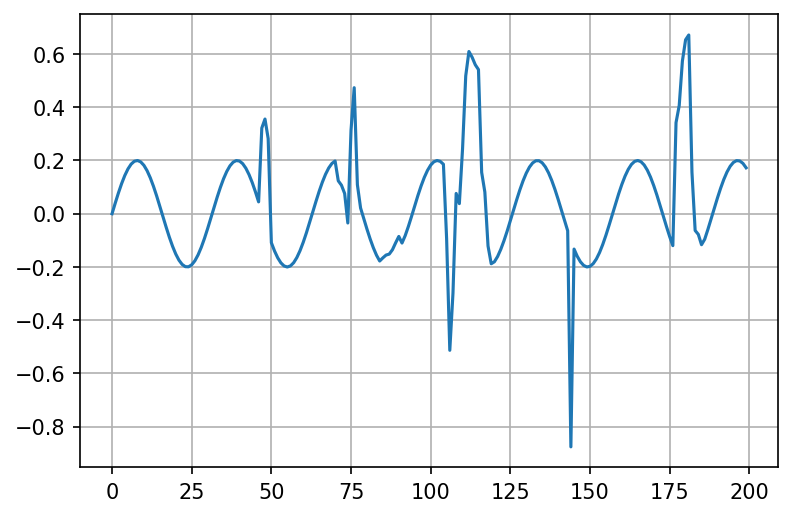

In [109]:
SignalGenerator(0, 200).with_peaks(5).with_peaks(3, direction=-1).sin(0.2, 0.2).draw()

In [133]:
print("datasize,ml_time,classic_time,ml_compressed_size,classic_compressed_size,ml_compression_ratio,classic_compression_ratio,ml_method,classic_method,ml_score,classic_score,ml_cbor_original_size,ml_cbor_compressed_size,ml_cbor_compressratio,classic_cbor_original_size,classic_cbor_compressed_size,classic_cbor_compressratio,ml_json_original_size,ml_json_compressed_size,ml_json_compressratio,classic_json_original_size,classic_json_compressed_size,classic_json_compressratio")

for datasize in [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
  dataset = measurement_provider.to_measurements(SignalGenerator(0, datasize).with_peaks(3).with_peaks(3, direction=-1).sin(0.2, 0.2))

  time_start = current_milis()
  compressed_data, stats, metrics = ml_method_selector.compress_with_best(dataset)
  time_end = current_milis()
  serialized_data_stats = compute_sizes(dataset, compressed_data, metrics)
  metrics_score = ClassicMethodSelector().compute_similarity_with_default_strategy(dataset, compressed_data)

  ml_time = time_end - time_start
  ml_compressed_size = stats['compressed_size']
  ml_compression_ratio = stats['compression_rate']
  ml_method = stats['method_name']
  ml_score = metrics_score
  ml_cbor_original_size = serialized_data_stats['senML_cbor_size_original']
  ml_cbor_compressed_size = serialized_data_stats['senML_cbor_size_compressed']
  ml_cbor_compressratio = serialized_data_stats['senML_cbor_size_ratio']
  ml_json_original_size = serialized_data_stats['senML_json_size_original']
  ml_json_compressed_size = serialized_data_stats['senML_json_size_compressed']
  ml_json_compressratio = serialized_data_stats['senML_json_size_ratio']

  ##############################################

  time_start = current_milis()
  compressed_data, stats, metrics, metrics_score = classic_method_selector.compress_with_best_default_strategy(dataset)
  time_end = current_milis()
  serialized_data_stats = compute_sizes(dataset, compressed_data, metrics)

  classic_time = time_end - time_start
  classic_compressed_size = stats['compressed_size']
  classic_compression_ratio = stats['compression_rate']
  classic_method = stats['method_name']
  classic_score = metrics_score
  classic_cbor_original_size = serialized_data_stats['senML_cbor_size_original']
  classic_cbor_compressed_size = serialized_data_stats['senML_cbor_size_compressed']
  classic_cbor_compressratio = serialized_data_stats['senML_cbor_size_ratio']
  classic_json_original_size = serialized_data_stats['senML_json_size_original']
  classic_json_compressed_size = serialized_data_stats['senML_json_size_compressed']
  classic_json_compressratio = serialized_data_stats['senML_json_size_ratio']

  print(f'{datasize},{ml_time},{classic_time},{ml_compressed_size},{classic_compressed_size},{ml_compression_ratio},{classic_compression_ratio},{ml_method},{classic_method},{ml_score},{classic_score},{ml_cbor_original_size},{ml_cbor_compressed_size},{ml_cbor_compressratio},{classic_cbor_original_size},{classic_cbor_compressed_size},{classic_cbor_compressratio},{ml_json_original_size},{ml_json_compressed_size},{ml_json_compressratio},{classic_json_original_size},{classic_json_compressed_size},{classic_json_compressratio}')

datasize,ml_time,classic_time,ml_compressed_size,classic_compressed_size,ml_compression_ratio,classic_compression_ratio,ml_method,classic_method,ml_score,classic_score,ml_cbor_original_size,ml_cbor_compressed_size,ml_cbor_compressratio,classic_cbor_original_size,classic_cbor_compressed_size,classic_cbor_compressratio,ml_json_original_size,ml_json_compressed_size,ml_json_compressratio,classic_json_original_size,classic_json_compressed_size,classic_json_compressratio
100,1.2890625,950.337158203125,5,90,0.95,0.1,CompressHigherDeriveration_0.6,CompressMinMax_0.9,10.588292749118718,15.11101178358376,2299,400,0.8260113092648977,2307,2107,0.08669267446900737,5557,603,0.8914882130646032,5541,5011,0.0956506045840101
200,1.62109375,1109.882080078125,3,118,0.985,0.41,CompressHigherDeriveration_0.6,CompressSTC_0.2,6.648773730940028,15.410131167457507,4243,304,0.9283525807211879,4307,2669,0.3803111214302299,10791,398,0.9631174126586971,10860,6531,0.39861878453038674
300,2.292724609375,1381.92919921

In [134]:
df = pd.read_csv('./results.csv')

In [136]:
df

,datasize,ml_time,classic_time,ml_compressed_size,classic_compressed_size,ml_compression_ratio,classic_compression_ratio,ml_method,classic_method,ml_score,...,ml_cbor_compressratio,classic_cbor_original_size,classic_cbor_compressed_size,classic_cbor_compressratio,ml_json_original_size,ml_json_compressed_size,ml_json_compressratio,classic_json_original_size,classic_json_compressed_size,classic_json_compressratio
0,100,2.295166,2239.055176,30,90,0.7,0.100000,CompressPIP_PD_0.3,CompressMinMax_0.9,14.480647,...,0.608090,2315,2115,0.086393,5509,1845,0.665093,5529,4996,0.096401
1,200,4.372070,2417.474854,100,115,0.5,0.425000,CompressPIP_ED_0.5,CompressSTC_0.2,13.136877,...,0.463896,4307,2609,0.394242,10861,5570,0.487156,10873,6370,0.414145
2,300,5.789307,2631.228027,150,210,0.5,0.300000,CompressPIP_ED_0.5,CompressMinMax_0.7,16.080364,...,0.474826,6308,4513,0.284559,16196,8256,0.490245,16193,11411,0.295313
3,400,7.082764,2976.325195,360,293,0.1,0.267500,CompressMinMax_0.9,CompressSTC_0.1,14.108608,...,0.095904,8308,6170,0.257342,21521,19382,0.099391,21537,15822,0.265357
4,500,10.249023,3278.009277,450,270,0.1,0.460000,CompressMinMax_0.9,CompressSTC_0.2,14.775275,...,0.096527,10308,5710,0.446061,26873,24199,0.099505,26874,14612,0.456277
5,600,9.998047,3807.394775,300,433,0.5,0.278333,CompressPIP_PD_0.5,CompressSTC_0.1,15.510762,...,0.487407,12308,8970,0.271206,32208,16229,0.496119,32223,23283,0.277442
6,700,12.483154,4293.606934,350,630,0.5,0.100000,CompressPIP_PD_0.5,CompressMinMax_0.9,15.516471,...,0.489511,14396,12990,0.097666,37548,18910,0.496378,37563,33805,0.100045
7,800,21.676025,4894.416992,720,640,0.1,0.200000,CompressMinMax_0.9,CompressMinMax_0.8,15.827029,...,0.097928,16604,13351,0.195917,42942,38627,0.100484,42942,34336,0.200410
8,900,24.886230,5622.184082,810,630,0.1,0.300000,CompressMinMax_0.9,CompressMinMax_0.7,14.134005,...,0.098574,18796,13244,0.295382,48250,43397,0.100580,48310,33846,0.299400
9,1000,23.170898,6674.798828,500,527,0.5,0.473000,CompressPIP_PD_0.5,CompressSTC_0.2,14.201466,...,0.493568,20996,11242,0.464565,53574,26910,0.497704,53590,28286,0.472178


<AxesSubplot:xlabel='datasize'>

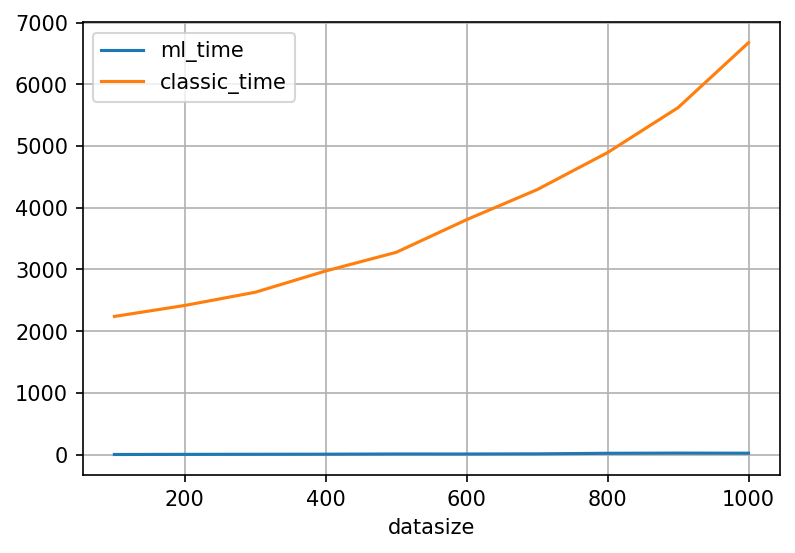

In [178]:
df.plot(x='datasize', y=['ml_time', 'classic_time'], grid=True)

<AxesSubplot:xlabel='datasize'>

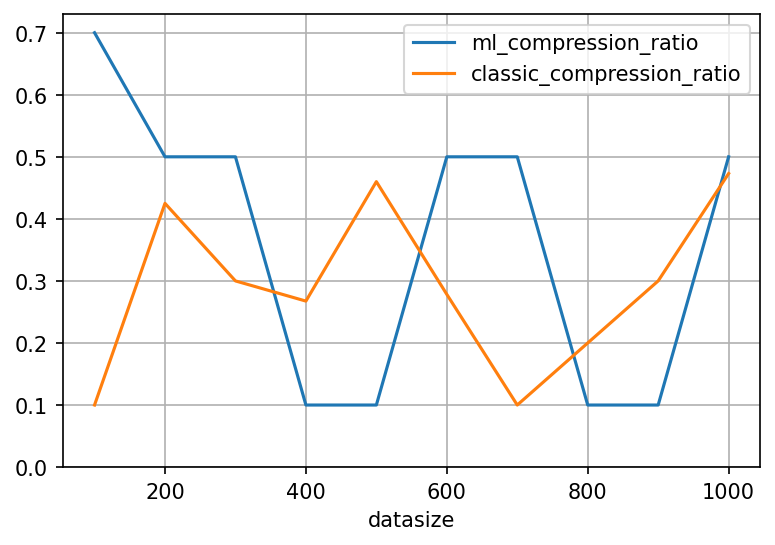

In [179]:
df.plot(x='datasize', y=['ml_compression_ratio', 'classic_compression_ratio'], grid=True, ylim=0)

<AxesSubplot:xlabel='datasize'>

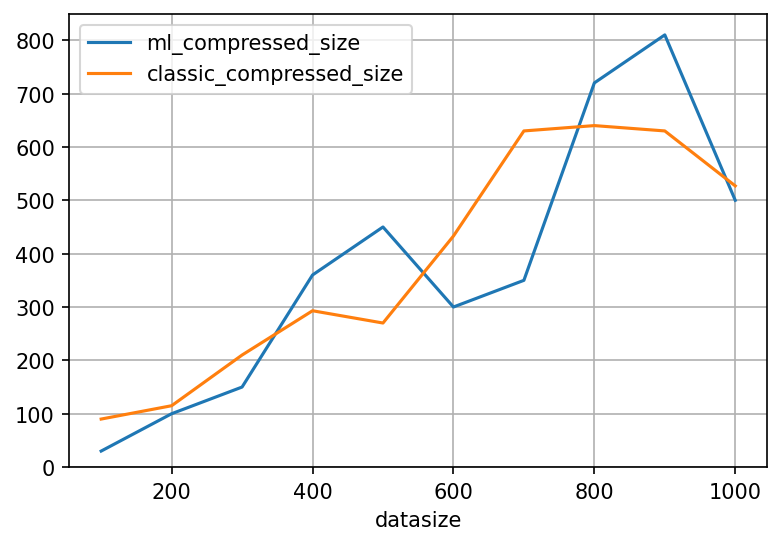

In [180]:
df.plot(x='datasize', y=['ml_compressed_size', 'classic_compressed_size'], grid=True, ylim=0)

<AxesSubplot:xlabel='datasize'>

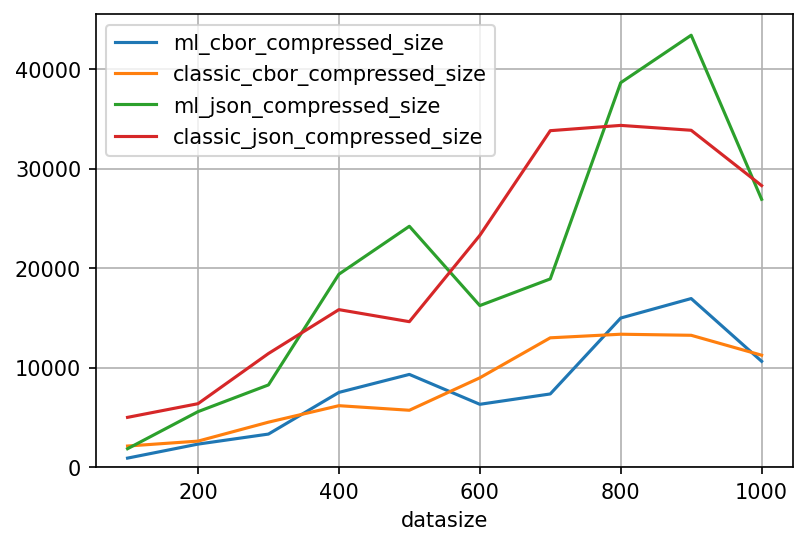

In [181]:
df.plot(x='datasize', y=['ml_cbor_compressed_size', 'classic_cbor_compressed_size', 'ml_json_compressed_size', 'classic_json_compressed_size'], grid=True, ylim=0)

<AxesSubplot:xlabel='datasize'>

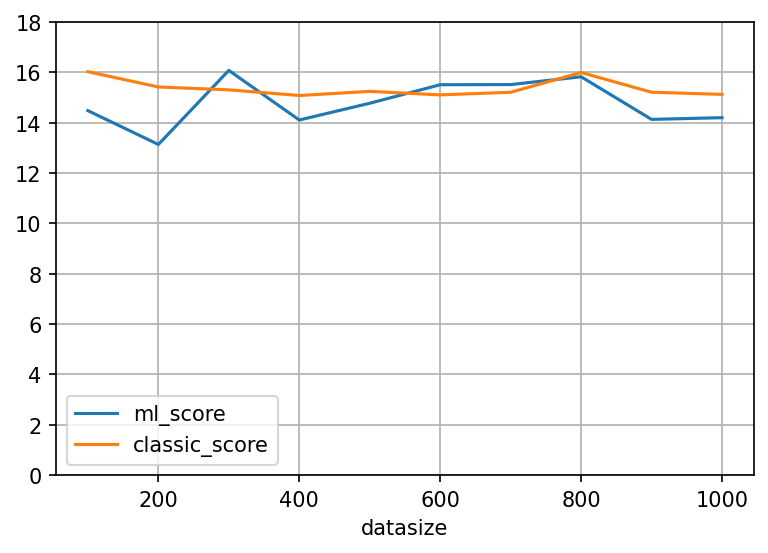

In [182]:
df.plot(x='datasize', y=['ml_score', 'classic_score'], grid=True, ylim=(0, 18))

In [183]:
for index, row in df[[
  'classic_cbor_original_size',
  'classic_cbor_compressed_size',
  'classic_cbor_compressratio',
]].iterrows():
  original_size = int(row[0])
  compressed_size = int(row[1])
  compressratio = round(row[2] * 100, 2)

  print(f'{(index + 1) * 100} & {original_size} & {compressed_size} & {compressratio} \\\\')
  print('\hline')

100 & 2315 & 2115 & 8.64 \\
\hline
200 & 4307 & 2609 & 39.42 \\
\hline
300 & 6308 & 4513 & 28.46 \\
\hline
400 & 8308 & 6170 & 25.73 \\
\hline
500 & 10308 & 5710 & 44.61 \\
\hline
600 & 12308 & 8970 & 27.12 \\
\hline
700 & 14396 & 12990 & 9.77 \\
\hline
800 & 16604 & 13351 & 19.59 \\
\hline
900 & 18796 & 13244 & 29.54 \\
\hline
1000 & 20996 & 11242 & 46.46 \\
\hline


In [184]:
for index, row in df[[
  'classic_json_original_size',
  'classic_json_compressed_size',
  'classic_json_compressratio', 
]].iterrows():
  original_size = int(row[0])
  compressed_size = int(row[1])
  compressratio = round(row[2] * 100, 2)

  print(f'{(index + 1) * 100} & {original_size} & {compressed_size} & {compressratio} \\\\')
  print('\hline')

100 & 5529 & 4996 & 9.64 \\
\hline
200 & 10873 & 6370 & 41.41 \\
\hline
300 & 16193 & 11411 & 29.53 \\
\hline
400 & 21537 & 15822 & 26.54 \\
\hline
500 & 26874 & 14612 & 45.63 \\
\hline
600 & 32223 & 23283 & 27.74 \\
\hline
700 & 37563 & 33805 & 10.0 \\
\hline
800 & 42942 & 34336 & 20.04 \\
\hline
900 & 48310 & 33846 & 29.94 \\
\hline
1000 & 53590 & 28286 & 47.22 \\
\hline


In [185]:
for index, row in df[[
  'classic_cbor_original_size',
  'classic_cbor_compressed_size',
  'classic_cbor_compressratio', 
  'classic_json_original_size',
  'classic_json_compressed_size',
  'classic_json_compressratio', 
]].iterrows():
  cbor_original_size = row[0]
  cbor_compressed_size = row[1]
  json_original_size = row[3]
  json_compressed_size = row[4]
  original_cbor_json_diff = int(json_original_size - cbor_original_size)
  original_cbor_json_ratio = round(cbor_original_size / json_original_size * 100, 2)
  compressed_cbor_json_diff = int(json_compressed_size - cbor_compressed_size)
  compressed_cbor_json_ratio = round(cbor_compressed_size / json_compressed_size * 100, 2)

  print(f'{(index + 1) * 100} & {original_cbor_json_diff} & {original_cbor_json_ratio} & {compressed_cbor_json_diff} & {compressed_cbor_json_ratio} \\\\')
  print('\hline')

100 & 3214 & 41.87 & 2881 & 42.33 \\
\hline
200 & 6566 & 39.61 & 3761 & 40.96 \\
\hline
300 & 9885 & 38.96 & 6898 & 39.55 \\
\hline
400 & 13229 & 38.58 & 9652 & 39.0 \\
\hline
500 & 16566 & 38.36 & 8902 & 39.08 \\
\hline
600 & 19915 & 38.2 & 14313 & 38.53 \\
\hline
700 & 23167 & 38.32 & 20815 & 38.43 \\
\hline
800 & 26338 & 38.67 & 20985 & 38.88 \\
\hline
900 & 29514 & 38.91 & 20602 & 39.13 \\
\hline
1000 & 32594 & 39.18 & 17044 & 39.74 \\
\hline


In [186]:
for index, row in df[[
  'ml_cbor_original_size',
  'ml_cbor_compressed_size',
  'ml_cbor_compressratio',
]].iterrows():
  original_size = int(row[0])
  compressed_size = int(row[1])
  compressratio = round(row[2] * 100, 2)

  print(f'{(index + 1) * 100} & {original_size} & {compressed_size} & {compressratio} \\\\')
  print('\hline')

100 & 2299 & 901 & 60.81 \\
\hline
200 & 4307 & 2309 & 46.39 \\
\hline
300 & 6316 & 3317 & 47.48 \\
\hline
400 & 8300 & 7504 & 9.59 \\
\hline
500 & 10308 & 9313 & 9.65 \\
\hline
600 & 12308 & 6309 & 48.74 \\
\hline
700 & 14396 & 7349 & 48.95 \\
\hline
800 & 16604 & 14978 & 9.79 \\
\hline
900 & 18788 & 16936 & 9.86 \\
\hline
1000 & 20988 & 10629 & 49.36 \\
\hline


In [187]:
for index, row in df[[
  'ml_json_original_size',
  'ml_json_compressed_size',
  'ml_json_compressratio', 
]].iterrows():
  original_size = int(row[0])
  compressed_size = int(row[1])
  compressratio = round(row[2] * 100, 2)

  print(f'{(index + 1) * 100} & {original_size} & {compressed_size} & {compressratio} \\\\')
  print('\hline')

100 & 5509 & 1845 & 66.51 \\
\hline
200 & 10861 & 5570 & 48.72 \\
\hline
300 & 16196 & 8256 & 49.02 \\
\hline
400 & 21521 & 19382 & 9.94 \\
\hline
500 & 26873 & 24199 & 9.95 \\
\hline
600 & 32208 & 16229 & 49.61 \\
\hline
700 & 37548 & 18910 & 49.64 \\
\hline
800 & 42942 & 38627 & 10.05 \\
\hline
900 & 48250 & 43397 & 10.06 \\
\hline
1000 & 53574 & 26910 & 49.77 \\
\hline


In [188]:
for index, row in df[[
  'ml_cbor_original_size',
  'ml_cbor_compressed_size',
  'ml_cbor_compressratio', 
  'ml_json_original_size',
  'ml_json_compressed_size',
  'ml_json_compressratio', 
]].iterrows():
  cbor_original_size = row[0]
  cbor_compressed_size = row[1]
  json_original_size = row[3]
  json_compressed_size = row[4]
  original_cbor_json_diff = int(json_original_size - cbor_original_size)
  original_cbor_json_ratio = round(cbor_original_size / json_original_size * 100, 2)
  compressed_cbor_json_diff = int(json_compressed_size - cbor_compressed_size)
  compressed_cbor_json_ratio = round(cbor_compressed_size / json_compressed_size * 100, 2)

  print(f'{(index + 1) * 100} & {original_cbor_json_diff} & {original_cbor_json_ratio} & {compressed_cbor_json_diff} & {compressed_cbor_json_ratio} \\\\')
  print('\hline')

100 & 3210 & 41.73 & 944 & 48.83 \\
\hline
200 & 6554 & 39.66 & 3261 & 41.45 \\
\hline
300 & 9880 & 39.0 & 4939 & 40.18 \\
\hline
400 & 13221 & 38.57 & 11878 & 38.72 \\
\hline
500 & 16565 & 38.36 & 14886 & 38.49 \\
\hline
600 & 19900 & 38.21 & 9920 & 38.87 \\
\hline
700 & 23152 & 38.34 & 11561 & 38.86 \\
\hline
800 & 26338 & 38.67 & 23649 & 38.78 \\
\hline
900 & 29462 & 38.94 & 26461 & 39.03 \\
\hline
1000 & 32586 & 39.18 & 16281 & 39.5 \\
\hline


In [189]:
for index, row in df[[
  'classic_cbor_compressed_size',
  'ml_cbor_compressed_size',
  'classic_json_compressed_size',
  'ml_json_compressed_size', 
]].iterrows():
  classic_cbor_compressed_size = row[0]
  ml_cbor_compressed_size = row[1]
  classic_json_compressed_size = row[2]
  ml_json_compressed_size = row[3]

  print(f'{(index + 1) * 100} & {classic_cbor_compressed_size} & {ml_cbor_compressed_size} & {classic_json_compressed_size} & {ml_json_compressed_size} \\\\')
  print('\hline')

100 & 2115 & 901 & 4996 & 1845 \\
\hline
200 & 2609 & 2309 & 6370 & 5570 \\
\hline
300 & 4513 & 3317 & 11411 & 8256 \\
\hline
400 & 6170 & 7504 & 15822 & 19382 \\
\hline
500 & 5710 & 9313 & 14612 & 24199 \\
\hline
600 & 8970 & 6309 & 23283 & 16229 \\
\hline
700 & 12990 & 7349 & 33805 & 18910 \\
\hline
800 & 13351 & 14978 & 34336 & 38627 \\
\hline
900 & 13244 & 16936 & 33846 & 43397 \\
\hline
1000 & 11242 & 10629 & 28286 & 26910 \\
\hline
